In [2]:
import numpy as np
import librosa
from IPython.display import Audio, display
from matplotlib import pyplot as plt
import soundfile as sf
from mystft import stft, istft

import sys
import os
# Add upper directory
current_dir = os.path.dirname(os.path.abspath('demo_stft_ola.ipynb'))
upper_dir = (os.path.join(current_dir, '..'))
sys.path.append(upper_dir)
from utils_global import draw_spec


### STFT

In [8]:
hop_length = 768
win_length = 1024
siglen = 40000
n_fft = 1024
y = np.random.randn(siglen)
######################
# Comparison with librosa
D = librosa.stft(y, n_fft=n_fft, window='hamming', win_length=win_length, hop_length=hop_length)
librosa_frames = D.shape[1]
print(D[0,:4])
print(D[0,-4:])
print(f"librosa STFT Frame num: {librosa_frames}\n")

D = stft(y, n_fft=n_fft, win_type='hamming', win_length=win_length, hop_length=hop_length, plot=False)
librosa_frames = D.shape[1]
print(D[0,:4])
print(D[0,-4:])
print(f"Implemented STFT Frame num: {librosa_frames}")


[-18.16402855+0.j -43.90306407+0.j -35.15068499+0.j -14.8659694 +0.j]
[15.287069  +0.j  2.65217339+0.j -1.91975935+0.j -9.67376004+0.j]
librosa STFT Frame num: 53

[-18.16402855+0.j -43.90306407+0.j -35.15068499+0.j -14.8659694 +0.j]
[15.287069  +0.j  2.65217339+0.j -1.91975935+0.j -9.67376004+0.j]
Implemented STFT Frame num: 53


(257, 107) (257, 107)
Implemented
[0.1402778  0.50447765 1.48364676 0.45122995 0.39031896]
Reference
[0.1402778  0.5044777  1.4836468  0.45122996 0.39031896]


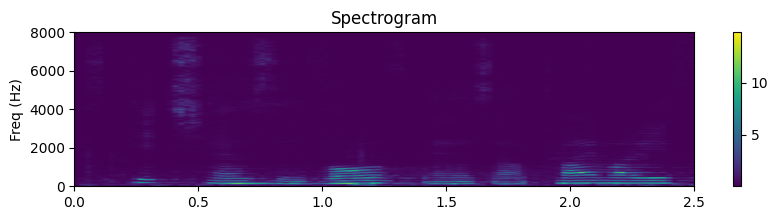

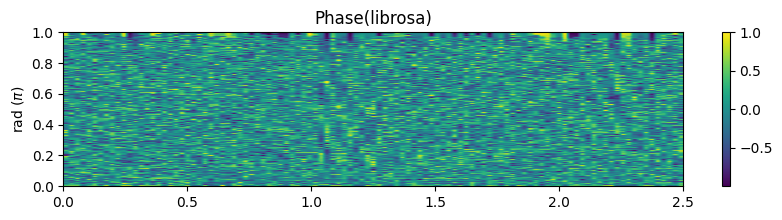

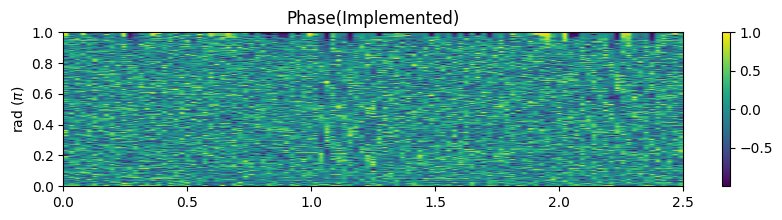

In [9]:
# Usage
hop_length = 375
win_length = 500
n_fft = 512
siglen = 40000
sr = 16000
#########################
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)
y, sr = librosa.load("./sample_crop_16kHz.wav", sr=None)

spec = stft(y, sr=sr, win_type='hamming', win_length=win_length, hop_length=hop_length, n_fft=n_fft, plot=False)
spec_librosa = librosa.stft(y, window='hamming', win_length=win_length, hop_length=hop_length, n_fft=n_fft)
print(spec.shape, spec_librosa.shape)

# Phase
phase1 = np.angle(spec) / np.pi
phase2 = np.angle(spec_librosa) / np.pi
spec, spec_librosa = np.abs(spec), np.abs(spec_librosa)

print('Implemented')
for freqaxis in range(1):
    print(spec[freqaxis,:5])
print('Reference')
for freqaxis in range(1):
    print(spec_librosa[freqaxis,:5])

# Plot Spectrogram 
plt.figure(figsize=(10,2))
plt.imshow(np.abs(spec), aspect='auto', 
                cmap='viridis', 
                origin='lower', extent=[0, 2.5, 0, sr//2])
plt.colorbar()
plt.ylabel(r"Freq (Hz)")
plt.title("Spectrogram")
plt.show()

# Plot Phase Spectra
plt.figure(figsize=(10,2))
plt.imshow(phase1, aspect='auto', 
                cmap='viridis', 
                origin='lower', extent=[0, 2.5, 0, 1])
plt.colorbar()
plt.ylabel(r"rad ($\pi$)")
plt.title("Phase(librosa)")
plt.show()

plt.figure(figsize=(10,2))
plt.imshow(phase2, aspect='auto', 
                cmap='viridis', 
                origin='lower', extent=[0, 2.5, 0, 1])
plt.colorbar()
plt.ylabel(r"rad ($\pi$)")
plt.title("Phase(Implemented)")
plt.show()

## ISTFT with OLA

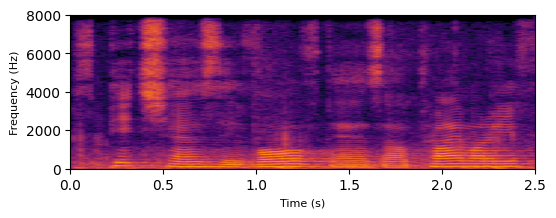

40000


In [10]:
""" 2.5 sec speech data """
path = "sample_crop_16kHz.wav"
y, sr = librosa.load(path, sr=16000)

t = draw_spec(y, sr=sr, use_colorbar=False, figsize=(6,2), return_fig=False)
display(Audio(y,rate=sr))
print(len(y))

Length of waveform:(40000,) Shape of Spec:(1025, 53)


original: (40000,)


reconstructed: (39936,)


library: (39936,)


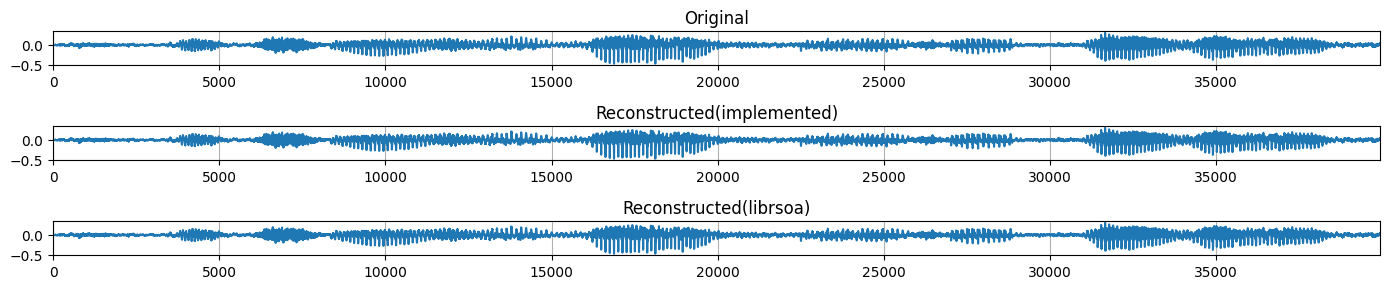

39936
[1.         0.99999059 0.99996235 0.99991529 0.99984941 0.99976471
 0.99966119 0.99953886 0.99939773 0.99923779]
Implemented
[-0.00024414 -0.00094604 -0.00112915 -0.00140381 -0.00216675 -0.00396729
 -0.00375366 -0.00396729 -0.003479   -0.00210571]
Reference Librosa
[-0.00024414 -0.00094604 -0.00112915 -0.00140381 -0.00216675 -0.00396729
 -0.00375366 -0.00396729 -0.003479   -0.00210571]


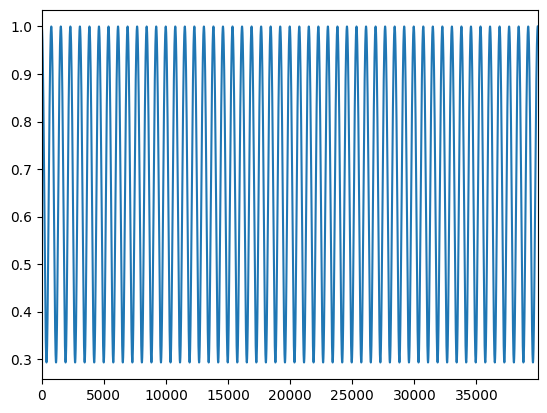

In [11]:
# Load & STFT
hop_length = 768
n_fft = 2048
win_length = 1024
y, sr = librosa.load('sample_crop_16kHz.wav', sr=16000)

spec = stft(y, sr=sr, win_type='hann', win_length=win_length, hop_length=hop_length, n_fft=n_fft)
print(f'Length of waveform:{y.shape} Shape of Spec:{spec.shape}')

# ISTFT
yhat,win = istft(spec, win_length=win_length, hop_length=hop_length, win_type='hann', n_fft=n_fft)
yhat_lib = librosa.istft(spec, win_length=win_length, hop_length=hop_length, n_fft=n_fft)

display(Audio(y, rate=16000))
print('original:', y.shape)
display(Audio(yhat, rate=16000))
print('reconstructed:', yhat.shape)
display(Audio(yhat_lib, rate=16000))
print('library:', yhat_lib.shape)

# Plot
plt.figure(figsize=(14,3))
plt.subplot(3,1,1)
plt.xlim(0,len(yhat))
plt.grid()
plt.title("Original")
plt.plot(y)

plt.subplot(3,1,2)
plt.plot(yhat)
plt.xlim(0,len(yhat))
plt.grid()
plt.title("Reconstructed(implemented)")

plt.subplot(3,1,3)
plt.plot(yhat_lib)
plt.xlim(0,len(yhat_lib))
plt.grid()
plt.title("Reconstructed(librsoa)")

plt.tight_layout()
plt.show()

plt.plot(win)
plt.xlim(0,len(win))
print(len(win))
print(win[:10])

print('Implemented')
print(yhat[:10])
print('Reference Librosa')
print(yhat_lib[:10])